<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_Second_Hand_Data_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Epoch [10/100], Loss: 0.9566
Epoch [20/100], Loss: 0.9272
Epoch [30/100], Loss: 0.8948
Epoch [40/100], Loss: 0.8580
Epoch [50/100], Loss: 0.8157
Epoch [60/100], Loss: 0.7670
Epoch [70/100], Loss: 0.7120
Epoch [80/100], Loss: 0.6512
Epoch [90/100], Loss: 0.5849
Epoch [100/100], Loss: 0.5133


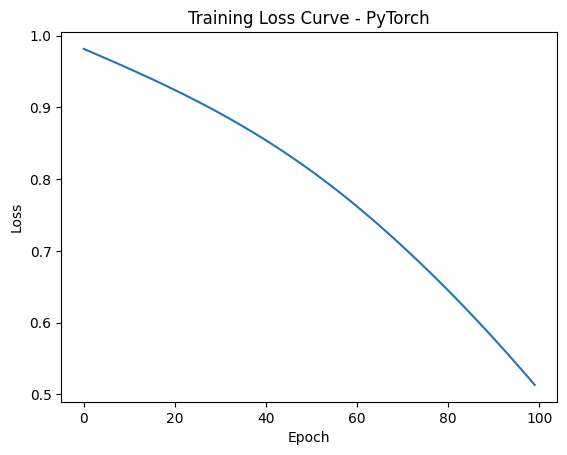

PyTorch Model Evaluation:
MSE: 8692850834.9468
RMSE: 93235.4591
R-Squared: 0.4829


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 - 8s - 333ms/step - loss: 0.4161 - mae: 0.4923 - val_loss: 0.0517 - val_mae: 0.1823
Epoch 2/100
25/25 - 0s - 17ms/step - loss: 0.0402 - mae: 0.1569 - val_loss: 0.0316 - val_mae: 0.1445
Epoch 3/100
25/25 - 1s - 27ms/step - loss: 0.0153 - mae: 0.0979 - val_loss: 0.0175 - val_mae: 0.1051
Epoch 4/100
25/25 - 1s - 31ms/step - loss: 0.0101 - mae: 0.0793 - val_loss: 0.0138 - val_mae: 0.0930
Epoch 5/100
25/25 - 1s - 34ms/step - loss: 0.0074 - mae: 0.0681 - val_loss: 0.0123 - val_mae: 0.0864
Epoch 6/100
25/25 - 1s - 23ms/step - loss: 0.0063 - mae: 0.0627 - val_loss: 0.0101 - val_mae: 0.0788
Epoch 7/100
25/25 - 0s - 12ms/step - loss: 0.0053 - mae: 0.0578 - val_loss: 0.0117 - val_mae: 0.0861
Epoch 8/100
25/25 - 0s - 12ms/step - loss: 0.0043 - mae: 0.0511 - val_loss: 0.0091 - val_mae: 0.0763
Epoch 9/100
25/25 - 0s - 7ms/step - loss: 0.0039 - mae: 0.0490 - val_loss: 0.0096 - val_mae: 0.0776
Epoch 10/100
25/25 - 0s - 11ms/step - loss: 0.0035 - mae: 0.0462 - val_loss: 0.0093 - val_m

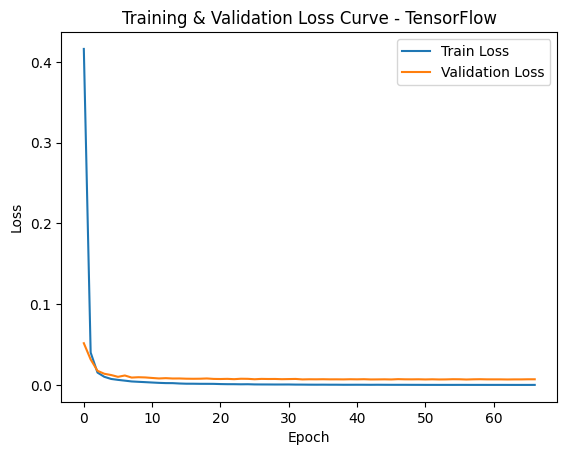

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
TensorFlow Model Evaluation:
MSE: 105449498.0296
RMSE: 10268.8606
R-Squared: 0.9937


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("secondhanddataset.csv")

# Drop the 'v.id' column if it exists
if 'v.id' in df.columns:
    df = df.drop(columns=['v.id'])

# Separate features (X) and target (y)
X = df.drop(columns=['current price']).values
y = df['current price'].values.reshape(-1, 1)  # Reshape target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalize target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define MLP model using PyTorch
class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = MLPModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 100
loss_history = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot loss curve
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve - PyTorch")
plt.show()

# Evaluate PyTorch model
model.eval()
y_pred_tensor = model(X_test_tensor).detach().numpy()
y_pred = scaler_y.inverse_transform(y_pred_tensor)
y_actual = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print(f"PyTorch Model Evaluation:\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR-Squared: {r2:.4f}")

# Define MLP model using TensorFlow
tf_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = tf_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stop])

# Plot TensorFlow loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curve - TensorFlow")
plt.legend()
plt.show()

# Evaluate TensorFlow model
y_pred_tf = tf_model.predict(X_test)
y_pred_tf = scaler_y.inverse_transform(y_pred_tf)

mse_tf = mean_squared_error(y_actual, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_actual, y_pred_tf)

print(f"TensorFlow Model Evaluation:\nMSE: {mse_tf:.4f}\nRMSE: {rmse_tf:.4f}\nR-Squared: {r2_tf:.4f}")



#Persamaan Matematika
##1. Fungsi Aktivasi (ReLU)
Pada kedua model (PyTorch dan TensorFlow), digunakan ReLU (Rectified Linear Unit) sebagai fungsi aktivasi. ReLU didefinisikan sebagai:

$f(x) = max(0,x)$

Di mana:
- Jika input $x$ lebih besar dari nol, maka output adalah $x$.
- Jika input $x$ lebih kecil atau sama dengan nol, maka output adalah nol.

ReLU digunakan karena tidak mengalami masalah vanishing gradient seperti sigmoid atau tanh dan sederhana serta efisien secara komputasi. <br><br>

##2. Fungsi Loss (Mean Squared Error - MSE)
Fungsi loss yang digunakan adalah Mean Squared Error (MSE), yang bertujuan untuk meminimalkan selisih antara nilai prediksi dan nilai aktual. Rumusnya adlaah:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Di mana:
- $n$ = jumlah sampel.
- $y_i$ = nilai aktual.
- $\hat{y}_i$ = nilai prediksi.

MSE dihitung dengan cara mengkuadratkan selisih antara prediksi dan target agar nilai error selalu positif, kemudian dihitung rata-ratanya. <br><br>

##3. Optimasi (Adam Optimizer)
Untuk mempercepat konvergensi, digunakan Adam Optimizer, yang merupakan gabungan dari Momentum dan RMSprop. Adam memperbarui bobot menggunakan rumus:

$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$
$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$

Di mana:
- $m_t$ = momentum gradien.
- $v_t$$ = estimasi rata-rata kuadrat gradien.
- $β_1, β_2$ = faktor eksponensial untuk gradien dan varians.<br><br>

##4. Root Mean Squared Error (RMSE)
Untuk memahami sejauh mana model meleset dalam satuan asli data, kita menggunakan RMSE yang didefinisikan sebagai:

$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

Di mana:
- $n$ = jumlah sampel dalam dataset
- $y_i$ = nilai aktual pada sampel ke-$i$
- $\hat{y}_i$ = nilai prediksi dari model pada sampel ke-$i$

RMSE lebih mudah diinterpretasikan karena dalam satuan yang sama dengan target.<br><br>

##5. Koefisien Determinasi (R-Squared)
Koefisien determinasi, atau $R^2$, adalah metrik yang mengukur seberapa baik model regresi dapat menjelaskan variabilitas data target. Rumusnya adalah:

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

Di mana:
- $\bar{y}$ = rata-rata dari semua nilai aktual $y_i$.
- Penyebut dalam persamaan ini adalah variansi total dari data, yang mewakili seberapa besar variasi dalam data asli tanpa model.
- Pembilang adalah jumlah kuadrat kesalahan model, yang menunjukkan seberapa jauh prediksi dari nilai sebenarnya.

Nilai $R^2$ berada dalam rentang antara 0 hingga 1. Semakin mendekati 1, semakin baik model dalam menjelaskan variabilitas data. Jika $R^2$=1, maka model menjelaskan 100% variabilitas dalam data, artinya semua prediksi tepat. Jika $R^2$=0, berarti model tidak lebih baik daripada sekadar menggunakan rata-rata $\bar{y}$ sebagai prediksi. Dalam beberapa kasus, $R^2$ bisa bernilai negatif jika model sangat buruk dan prediksinya lebih buruk dibandingkan dengan sekadar menggunakan nilai rata-rata sebagai estimasi.